```
!pip install amazon-braket-sdk
```
Done

In [ ]:
import pennylane as qml

### operator test

In [21]:
import networkx
import networks as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import expm
from random import random
from adiaframe import Hamiltonian
from adiaframe import utils as uc

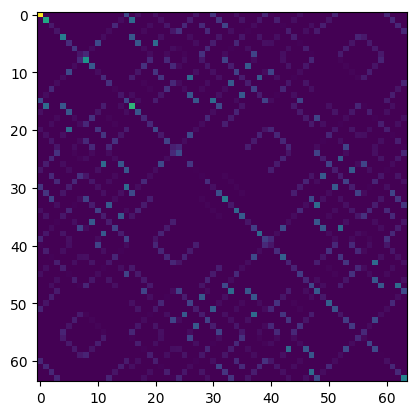

In [22]:
pstrs = pd.read_csv("H3+-2.1_node.csv")["Pstring"]
pauli_sample = {}
for p in pstrs:
    pauli_sample[p] = random()
H = Hamiltonian.p_poly_to_H(pauli_sample)
plt.imshow(np.abs(H))

In [23]:
expm(-1*H)

array([[ 3.35154595+0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  5.97222898+0.j,  0.        +0.j, ...,
        21.28153431+0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, 27.96772124+0.j, ...,
         0.        +0.j, 25.72423712+0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j, 21.28153431+0.j,  0.        +0.j, ...,
        98.03008386+0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, 25.72423712+0.j, ...,
         0.        +0.j, 32.56407912+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  3.25238407+0.j]])

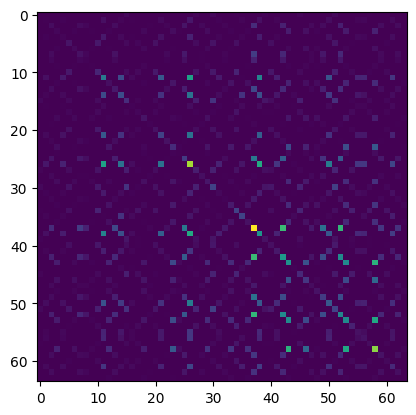

In [24]:
plt.imshow(np.abs(expm(-1*H)))

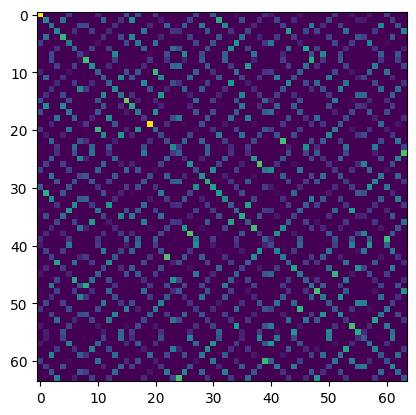

In [25]:
plt.imshow(np.abs(expm(-1j*H)))

In [26]:
U = expm(-1j*H)
A = expm(-1*H)

In [27]:
U.shape

(64, 64)

In [28]:
2**6

64

In [29]:
rx_func = lambda theta: np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], 
                        [-1j*np.sin(theta/2), np.cos(theta/2)]])
Rx_theta = rx_func(np.pi/6)

In [30]:
plt.imshow(np.abs(expm(-1j*H)))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3032030602.py, line 1)

In [36]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

In [40]:
n1, n2 = U.shape

In [44]:
I = np.eye(2)
pauli_X = np.array([[0, 1], [1, 0]], dtype=complex)
pauli_Y = complex(0, 1)*np.array([[0, -1], [1, 0]], dtype=complex)
pauli_Z = np.array([[1, 0], [0, -1]], dtype=complex)
p_basis = {"I":I, "X":pauli_X, "Y":pauli_Y, "Z":pauli_Z}
s_00 = np.array([
    [1,0],
    [0,0]])
s_01 = np.array([
    [0,1],
    [0,0]])
s_10 = np.array([
    [0,0],
    [1,0]])
s_11 = np.array([
    [0,0],
    [0,1]])

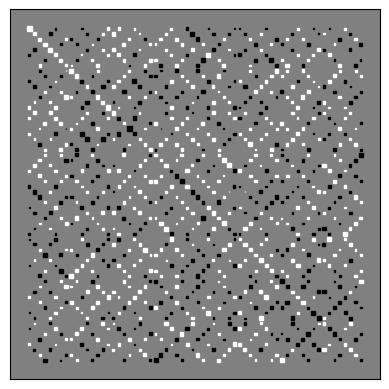

In [41]:
hinton(uc.krons([Rx_theta, U])[:n1, : n2])

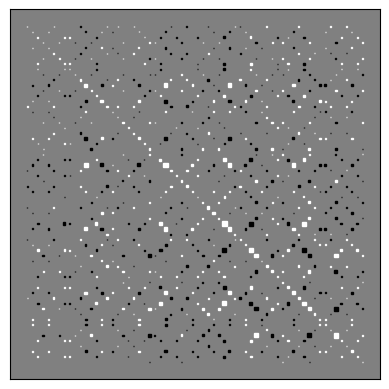

In [42]:
hinton(A)